In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import math
import os
import json
import copy
import shutil
import PIL
import pickle


import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms, utils

from tqdm import tqdm, trange
from core.dataset import COCODataset, COCODatasetWithID, COCODatasetGeneral
from core.model import Model
from core.metrics import AccuracyLogger
from collections import Counter, OrderedDict, defaultdict

In [10]:
encoder = torchvision.models.densenet169(weights=True)

/Users/renxuezhe/miniforge3/envs/ml/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
encoder.features

In [6]:
dataset_general = COCODatasetGeneral("./coco18_newtrainall.json", './coco18_all', image_size =(224,224))

-------------------------------
Annotation Counts
-------------------------------
potted plant               8631
tv                         5803
bottle                    24070
chair                     38073
car                       43533
stop sign                  1983
clock                      6320
cup                       20574
fork                       5474
knife                      7760
bowl                      14323
toilet                     4149
laptop                     4960
mouse                      2261
keyboard                   2854
microwave                  1672
oven                       3334
sink                       5609
Total                    201383
-------------------------------



In [7]:
with open("coco18_normalized.pkl", "rb") as tf:
    new_dict = pickle.load(tf)

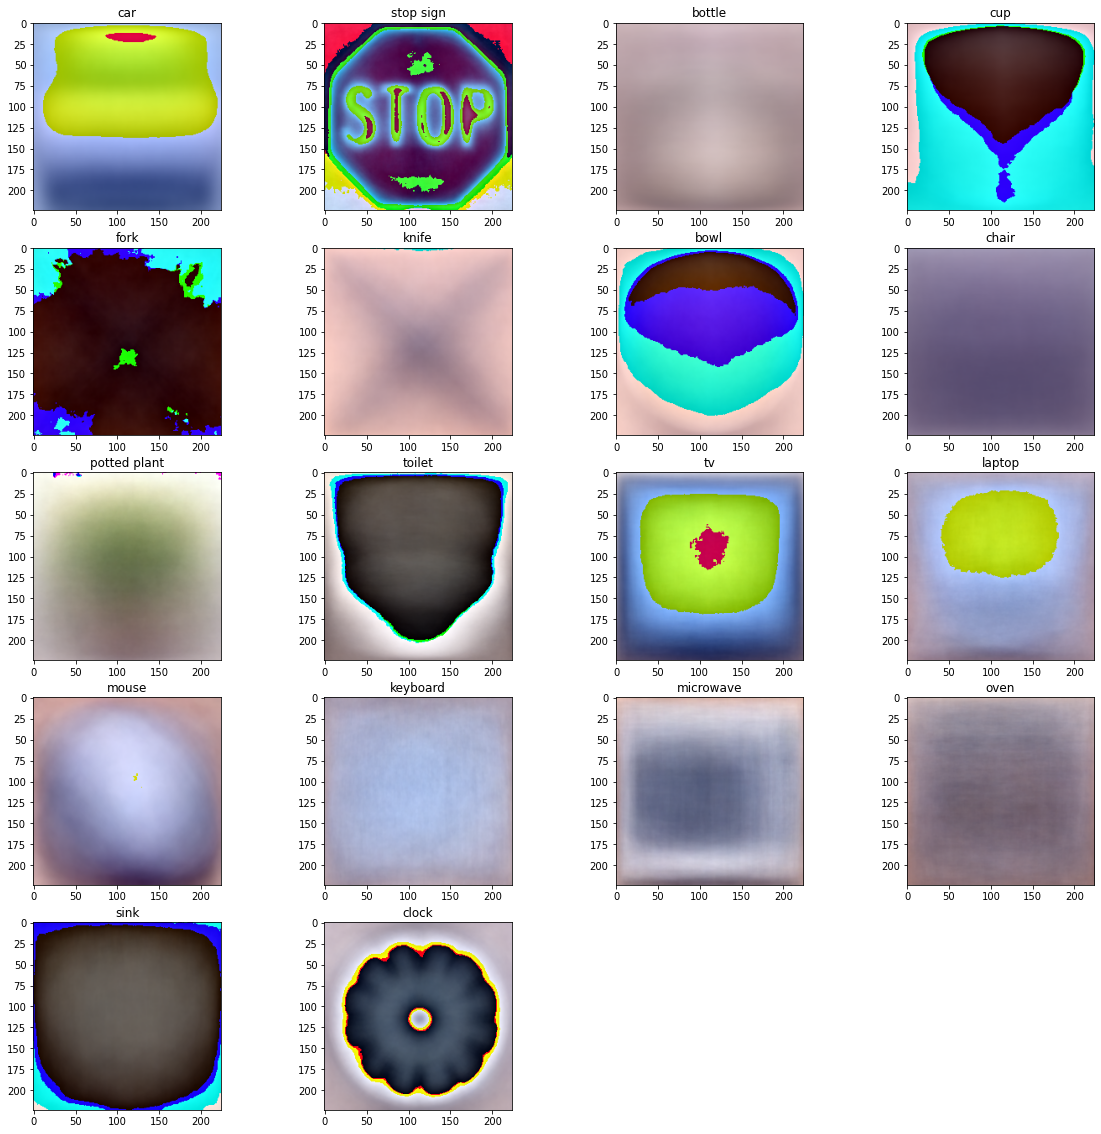

In [27]:
counter = 1
plt.figure(1, figsize=(20, 20))
# plt.(20, 10)

for key in new_dict.keys():
    plt.subplot(5, 4, counter)
    counter += 1 
    image = new_dict[key]
    plt.imshow(transforms.ToPILImage()(image))
    plt.title(key)